# Plot Results from All Algorithm Runs

This notebook loads and plots results from all three algorithms (sgd_relu, alt_em_sgd, alt_em_closed_form) that were run sequentially on the same data.


In [10]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import glob


In [ ]:
# Configuration: Set the output directory path
# You can either specify a specific experiment directory or use the most recent one
outputs_dir = "/home/goring/NN_alternatecoding/outputs/ksparse_parity_1511_2_20251115_024857"

# Option 1: Use the most recent experiment
experiment_dirs = sorted(glob.glob(os.path.join(outputs_dir, "*")))
if experiment_dirs:
    experiment_dir = experiment_dirs[-1]  # Most recent
    print(f"Using experiment directory: {experiment_dir}")
else:
    raise ValueError(f"No experiment directories found in {outputs_dir}")

# Option 2: Or specify a specific directory
# experiment_dir = "outputs/your_experiment_name_20250101_120000"


Using experiment directory: outputs/ksparse_parity_1511_20251115_024047


In [12]:
# Load data for all algorithms
algorithms = ["sgd_relu", "alt_em_sgd", "alt_em_closed_form"]
data = {}

for algo in algorithms:
    algo_dir = os.path.join(experiment_dir, algo)
    if not os.path.exists(algo_dir):
        print(f"Warning: Directory {algo_dir} not found, skipping {algo}")
        continue
    
    # Load training history
    history_path = os.path.join(algo_dir, "training_history.csv")
    if os.path.exists(history_path):
        data[algo] = {"history": pd.read_csv(history_path)}
    else:
        print(f"Warning: {history_path} not found")
        continue
    
    # Load final metrics
    metrics_path = os.path.join(algo_dir, "final_metrics.json")
    if os.path.exists(metrics_path):
        with open(metrics_path, 'r') as f:
            data[algo]["final_metrics"] = json.load(f)
    
    # Load losses
    losses_path = os.path.join(algo_dir, "losses.json")
    if os.path.exists(losses_path):
        with open(losses_path, 'r') as f:
            data[algo]["losses"] = json.load(f)

print(f"Loaded data for {len(data)} algorithms: {list(data.keys())}")


Loaded data for 3 algorithms: ['sgd_relu', 'alt_em_sgd', 'alt_em_closed_form']


## Plot Training and Validation Losses


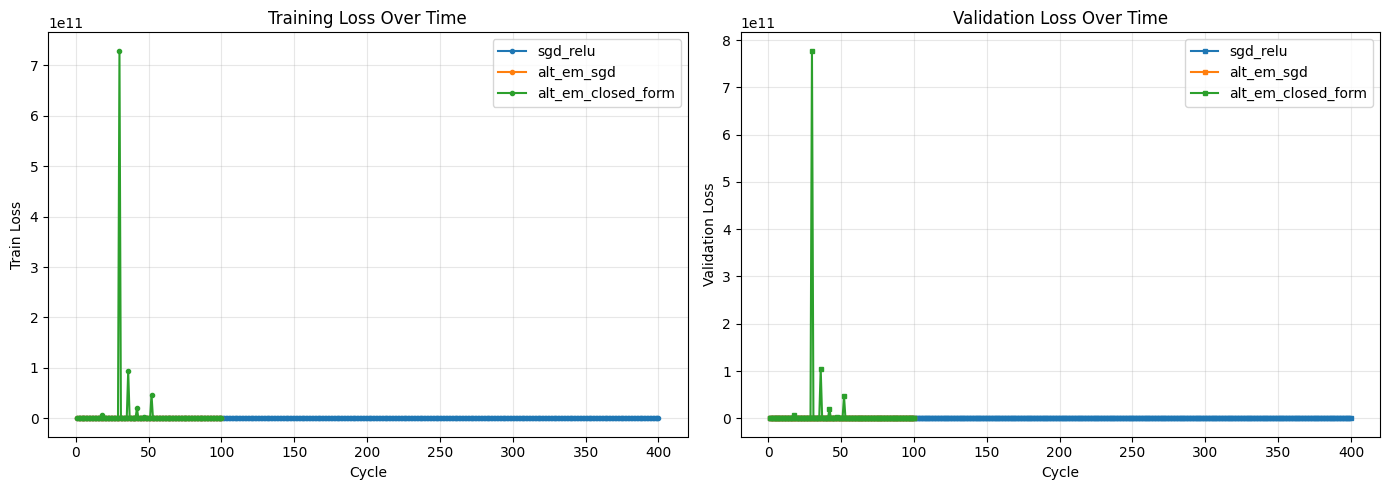

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot training losses
ax1 = axes[0]
for algo, algo_data in data.items():
    history = algo_data["history"]
    if "train_loss" in history.columns:
        x_key = "epoch" if "epoch" in history.columns else "cycle"
        ax1.plot(history[x_key], history["train_loss"], label=algo, marker='o', markersize=3)
ax1.set_xlabel(x_key.capitalize())
ax1.set_ylabel("Train Loss")
ax1.set_title("Training Loss Over Time")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot validation losses
ax2 = axes[1]
for algo, algo_data in data.items():
    history = algo_data["history"]
    if "val_loss" in history.columns:
        x_key = "epoch" if "epoch" in history.columns else "cycle"
        ax2.plot(history[x_key], history["val_loss"], label=algo, marker='s', markersize=3)
ax2.set_xlabel(x_key.capitalize())
ax2.set_ylabel("Validation Loss")
ax2.set_title("Validation Loss Over Time")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Plot Training and Test Accuracies


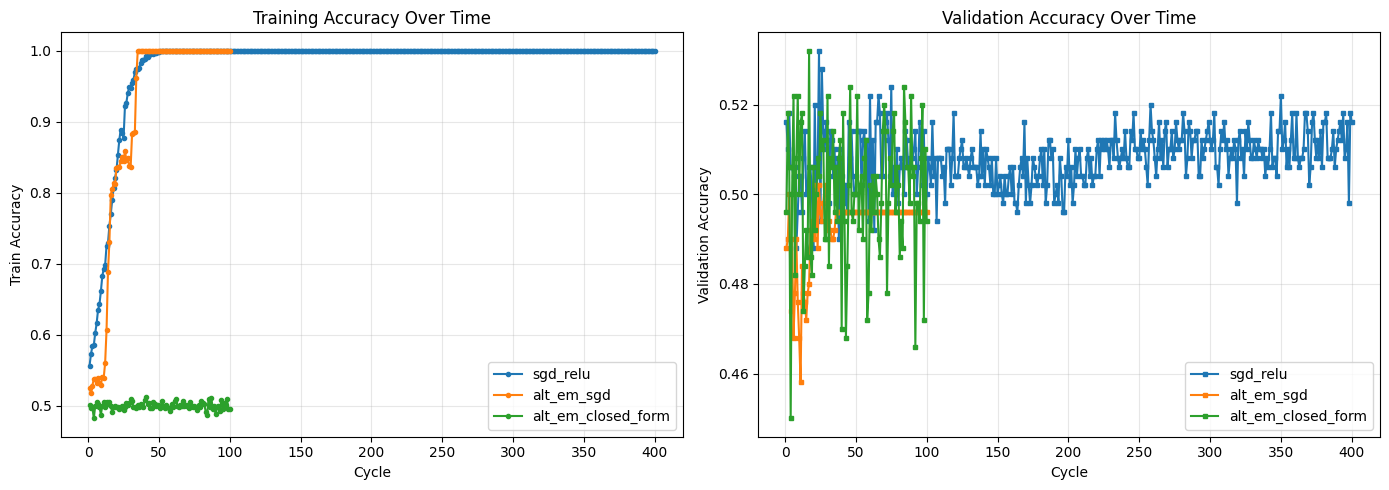

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot training accuracies
ax1 = axes[0]
for algo, algo_data in data.items():
    history = algo_data["history"]
    if "train_acc" in history.columns:
        x_key = "epoch" if "epoch" in history.columns else "cycle"
        ax1.plot(history[x_key], history["train_acc"], label=algo, marker='o', markersize=3)
ax1.set_xlabel(x_key.capitalize())
ax1.set_ylabel("Train Accuracy")
ax1.set_title("Training Accuracy Over Time")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot validation accuracies
ax2 = axes[1]
for algo, algo_data in data.items():
    history = algo_data["history"]
    if "val_acc" in history.columns:
        x_key = "epoch" if "epoch" in history.columns else "cycle"
        ax2.plot(history[x_key], history["val_acc"], label=algo, marker='s', markersize=3)
ax2.set_xlabel(x_key.capitalize())
ax2.set_ylabel("Validation Accuracy")
ax2.set_title("Validation Accuracy Over Time")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Plot Final Metrics Comparison


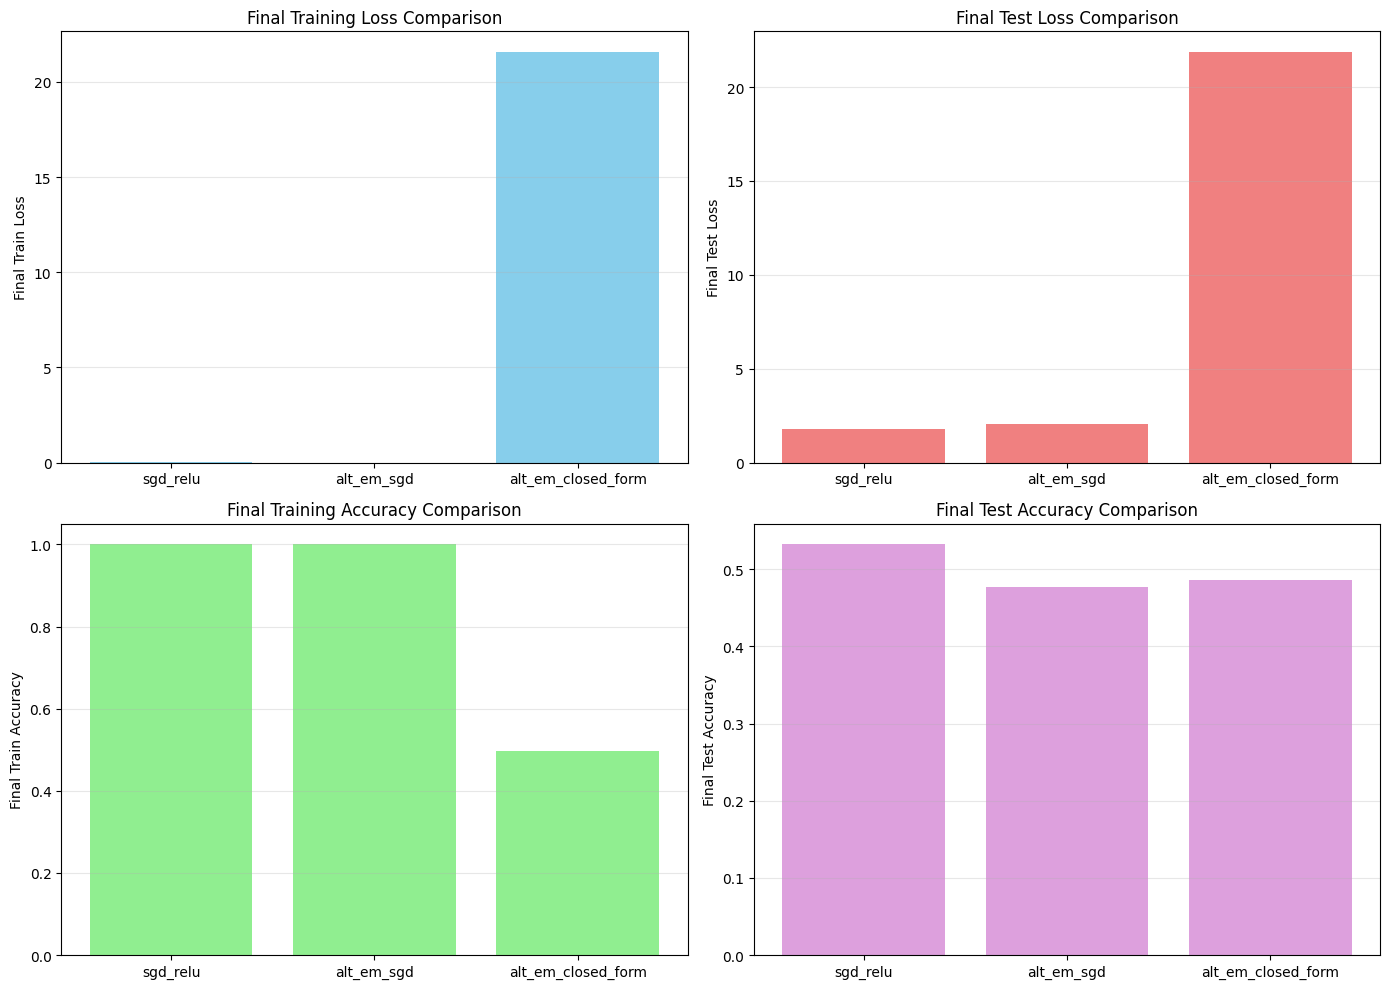

In [15]:
# Extract final metrics
final_train_losses = []
final_test_losses = []
final_train_accs = []
final_test_accs = []
algo_names = []

for algo, algo_data in data.items():
    if "final_metrics" in algo_data:
        metrics = algo_data["final_metrics"]
        final_train_losses.append(metrics.get("train_loss", 0))
        final_test_losses.append(metrics.get("test_loss", 0))
        final_train_accs.append(metrics.get("train_acc", 0))
        final_test_accs.append(metrics.get("test_acc", 0))
        algo_names.append(algo)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Final train loss
axes[0, 0].bar(algo_names, final_train_losses, color='skyblue')
axes[0, 0].set_ylabel("Final Train Loss")
axes[0, 0].set_title("Final Training Loss Comparison")
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Final test loss
axes[0, 1].bar(algo_names, final_test_losses, color='lightcoral')
axes[0, 1].set_ylabel("Final Test Loss")
axes[0, 1].set_title("Final Test Loss Comparison")
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Final train accuracy
axes[1, 0].bar(algo_names, final_train_accs, color='lightgreen')
axes[1, 0].set_ylabel("Final Train Accuracy")
axes[1, 0].set_title("Final Training Accuracy Comparison")
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Final test accuracy
axes[1, 1].bar(algo_names, final_test_accs, color='plum')
axes[1, 1].set_ylabel("Final Test Accuracy")
axes[1, 1].set_title("Final Test Accuracy Comparison")
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## Plot Slope Metrics (for gated algorithms)

These metrics are only available for alt_em_sgd and alt_em_closed_form since they use gates.


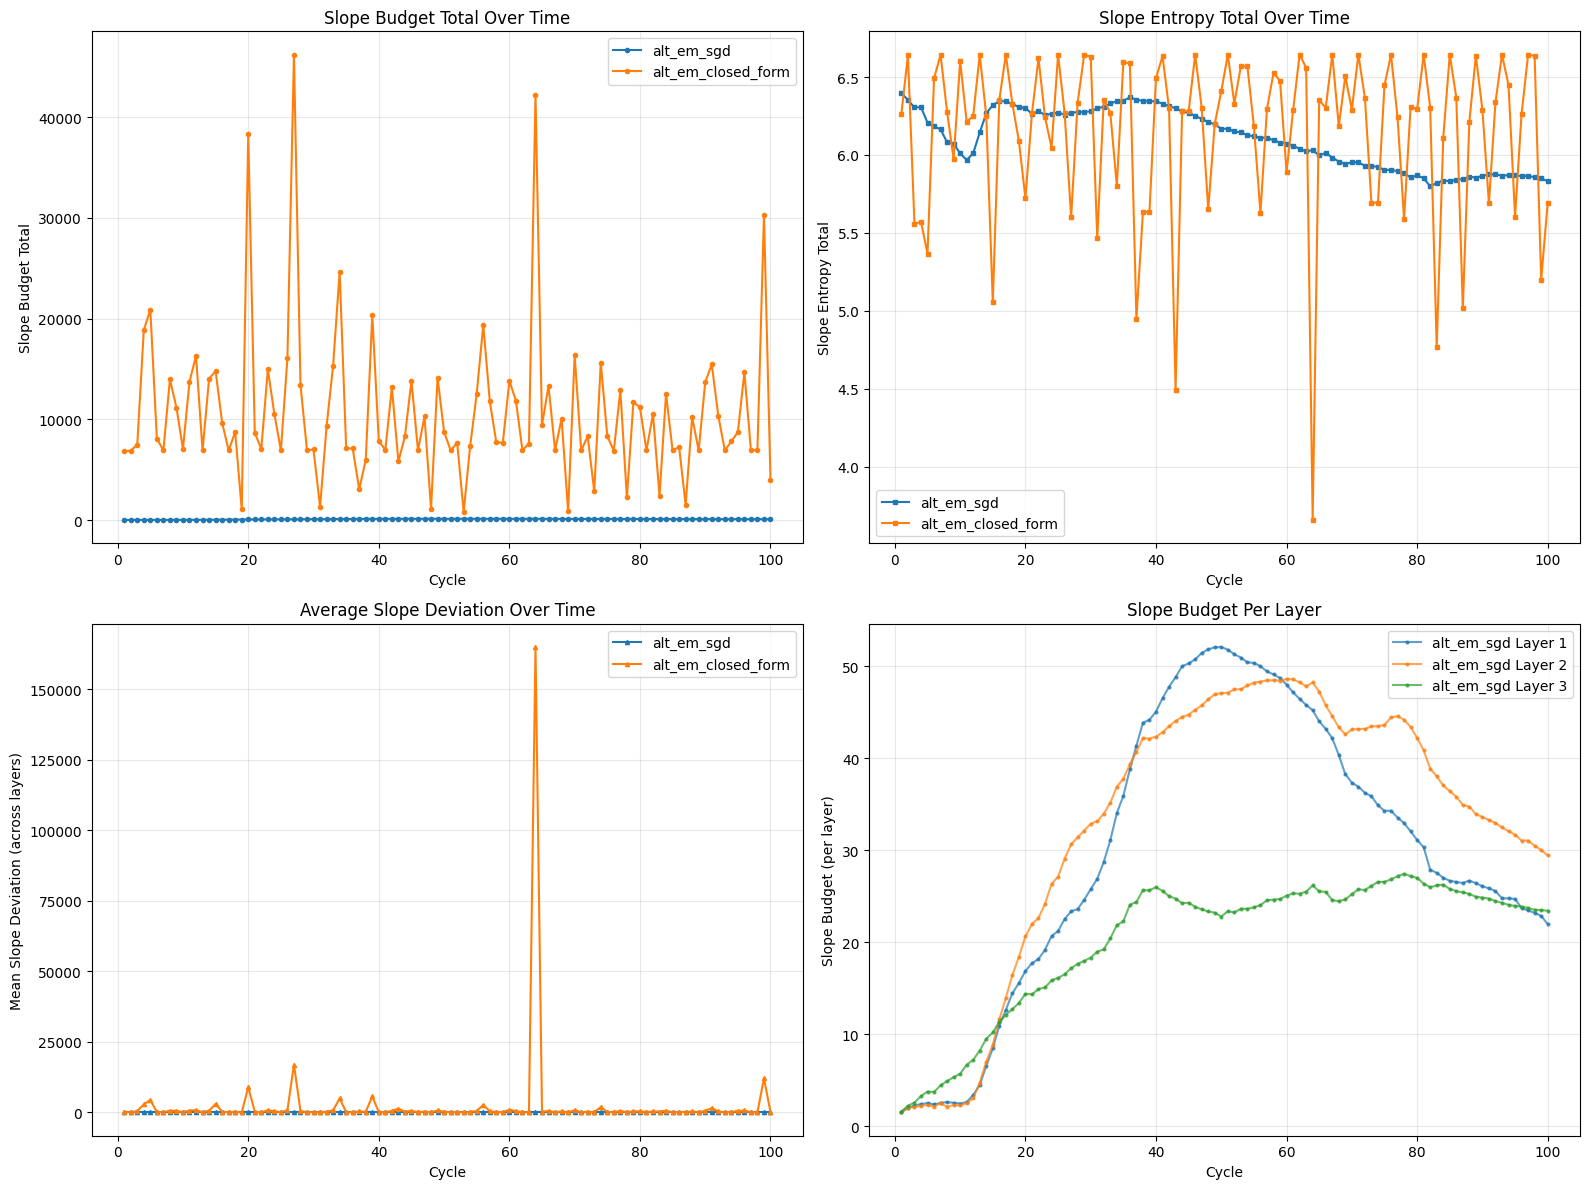

In [16]:
import ast

# Helper function to parse stringified lists from CSV
def parse_list_string(s):
    """Parse a string representation of a list into an actual list."""
    if pd.isna(s) or s is None:
        return None
    if isinstance(s, (list, np.ndarray)):
        return s
    try:
        return ast.literal_eval(str(s))
    except:
        return None

# Plot slope metrics for gated algorithms
gated_algos = ["alt_em_sgd", "alt_em_closed_form"]
has_gated_data = any(algo in data for algo in gated_algos)

if has_gated_data:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot slope budget total
    ax1 = axes[0, 0]
    for algo in gated_algos:
        if algo not in data:
            continue
        history = data[algo]["history"]
        if "slope_budget_total" in history.columns:
            x_key = "epoch" if "epoch" in history.columns else "cycle"
            # Convert to numeric, handling NaN
            budget_values = pd.to_numeric(history["slope_budget_total"], errors='coerce')
            ax1.plot(history[x_key], budget_values, label=algo, marker='o', markersize=3)
    ax1.set_xlabel(x_key.capitalize())
    ax1.set_ylabel("Slope Budget Total")
    ax1.set_title("Slope Budget Total Over Time")
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot slope entropy total
    ax2 = axes[0, 1]
    for algo in gated_algos:
        if algo not in data:
            continue
        history = data[algo]["history"]
        if "slope_entropy_total" in history.columns:
            x_key = "epoch" if "epoch" in history.columns else "cycle"
            entropy_values = pd.to_numeric(history["slope_entropy_total"], errors='coerce')
            ax2.plot(history[x_key], entropy_values, label=algo, marker='s', markersize=3)
    ax2.set_xlabel(x_key.capitalize())
    ax2.set_ylabel("Slope Entropy Total")
    ax2.set_title("Slope Entropy Total Over Time")
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot slope deviation (average across layers)
    ax3 = axes[1, 0]
    for algo in gated_algos:
        if algo not in data:
            continue
        history = data[algo]["history"]
        if "slope_deviation_layers" in history.columns:
            x_key = "epoch" if "epoch" in history.columns else "cycle"
            # Parse list and compute mean
            deviation_means = []
            for idx, row in history.iterrows():
                dev_list = parse_list_string(row["slope_deviation_layers"])
                if dev_list is not None and len(dev_list) > 0:
                    deviation_means.append(np.mean(dev_list))
                else:
                    deviation_means.append(np.nan)
            ax3.plot(history[x_key], deviation_means, label=algo, marker='^', markersize=3)
    ax3.set_xlabel(x_key.capitalize())
    ax3.set_ylabel("Mean Slope Deviation (across layers)")
    ax3.set_title("Average Slope Deviation Over Time")
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot per-layer slope budget (for first algorithm with data)
    ax4 = axes[1, 1]
    for algo in gated_algos:
        if algo not in data:
            continue
        history = data[algo]["history"]
        if "slope_budget_layers" in history.columns:
            x_key = "epoch" if "epoch" in history.columns else "cycle"
            # Parse and plot each layer
            for layer_idx in range(3):  # Assuming 3 layers
                layer_values = []
                for idx, row in history.iterrows():
                    budget_list = parse_list_string(row["slope_budget_layers"])
                    if budget_list is not None and layer_idx < len(budget_list):
                        layer_values.append(budget_list[layer_idx])
                    else:
                        layer_values.append(np.nan)
                ax4.plot(history[x_key], layer_values, 
                        label=f"{algo} Layer {layer_idx+1}", 
                        marker='o', markersize=2, alpha=0.7)
            break  # Only plot for first algorithm to avoid clutter
    ax4.set_xlabel(x_key.capitalize())
    ax4.set_ylabel("Slope Budget (per layer)")
    ax4.set_title("Slope Budget Per Layer")
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No gated algorithm data available for slope metrics.")


## Summary Table


## Extended Summary Table with Slope Metrics


In [17]:
# Create an extended summary DataFrame with slope metrics
summary_data = []
for algo, algo_data in data.items():
    if "final_metrics" in algo_data:
        metrics = algo_data["final_metrics"]
        row = {
            "Algorithm": algo,
            "Train Loss": f"{metrics.get('train_loss', 0):.6f}",
            "Test Loss": f"{metrics.get('test_loss', 0):.6f}",
            "Train Acc": f"{metrics.get('train_acc', 0):.4f}",
            "Test Acc": f"{metrics.get('test_acc', 0):.4f}",
            "Val Loss": f"{metrics.get('val_loss', 0):.6f}",
            "Val Acc": f"{metrics.get('val_acc', 0):.4f}"
        }
        
        # Add slope metrics if available (from last cycle/epoch)
        if "history" in algo_data:
            history = algo_data["history"]
            if "slope_budget_total" in history.columns:
                last_budget = pd.to_numeric(history["slope_budget_total"], errors='coerce').iloc[-1]
                if not pd.isna(last_budget):
                    row["Final Slope Budget"] = f"{last_budget:.2f}"
            if "slope_entropy_total" in history.columns:
                last_entropy = pd.to_numeric(history["slope_entropy_total"], errors='coerce').iloc[-1]
                if not pd.isna(last_entropy):
                    row["Final Slope Entropy"] = f"{last_entropy:.4f}"
            if "slope_deviation_layers" in history.columns:
                last_dev = parse_list_string(history["slope_deviation_layers"].iloc[-1])
                if last_dev is not None and len(last_dev) > 0:
                    row["Final Mean Slope Dev"] = f"{np.mean(last_dev):.4f}"
        
        summary_data.append(row)

if summary_data:
    summary_df = pd.DataFrame(summary_data)
    print("\nSummary of Final Metrics (including slope metrics for gated algorithms):")
    print(summary_df.to_string(index=False))
else:
    print("No summary data available.")



Summary of Final Metrics (including slope metrics for gated algorithms):
         Algorithm Train Loss Test Loss Train Acc Test Acc  Val Loss Val Acc Final Slope Budget Final Slope Entropy Final Mean Slope Dev
          sgd_relu   0.010315  1.790687    1.0000   0.5320  1.809085  0.5160                NaN                 NaN                  NaN
        alt_em_sgd   0.001257  2.042850    1.0000   0.4765  1.969730  0.4960              74.82              5.8308               0.0305
alt_em_closed_form  21.582418 21.871313    0.4958   0.4855 22.609890  0.4940            4010.95              5.6925             116.3890
